In [314]:
%%bash
ls -lth ../../promec/Animesh/Lymphoma/

total 36M
-rwxr-xr-x 1 root root  4,6K sep.  28 17:33 LarsSelFtrDF.csv
-rwxr-xr-x 1 root root  123K sep.  28 17:10 Thumbs.db
-rwxr-xr-x 1 root root   41K sep.  28 17:10 A0A087X0I3vO75995.png
-rwxr-xr-x 1 root root  1,8K sep.  28 13:24 LarsFtrSelVal.csv
-rwxr-xr-x 1 root root  1,8K sep.  28 13:24 LarsFtrSelVal.txt
-rwxr-xr-x 1 root root    48 sep.  28 13:15 LarsFtrSel.txt
-rwxr-xr-x 1 root root 1000K sep.  28 12:37 GroupHenrikList_version2Val.csv
-rwxr-xr-x 1 root root 1000K sep.  28 12:36 GroupHenrikList_version2Val .txt
-rwxr-xr-x 1 root root  1,9K sep.  28 12:31 GroupHenrikList_version2 .txt
-rwxr-xr-x 1 root root  3,0K sep.  27 19:26 HenrikFtrSelValTrp.csv
-rwxr-xr-x 1 root root  3,0K sep.  27 19:26 HenrikFtrSelValTrp.txt
-rwxr-xr-x 1 root root  2,0K sep.  27 19:23 HenrikFtrSelVal.csv
-rwxr-xr-x 1 root root  2,0K sep.  27 19:21 HenrikFtrSelVal.txt
-rwxr-xr-x 1 root root  1,8K sep.  27 19:19 GroupHenrikList.txt
-rwxr-xr-x 1 root root    55 sep.  27 13:56 HenrikFtrSel.txt
-rwxr-xr-x 1

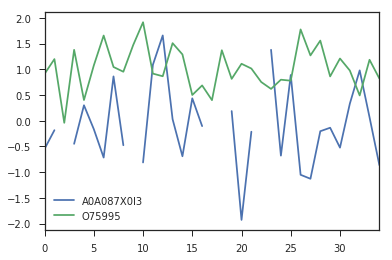

In [304]:
import pandas
%matplotlib inline
nm = pandas.read_table('../../promec/Animesh/Lymphoma/Groups.txt')
df = pandas.read_table('../../promec/Animesh/Lymphoma/Copy of SuperSILACpTtestLars DoesNotWantButtStillWantsremoved.txt')
sb = pandas.read_table('../../promec/Animesh/Lymphoma/HenrikList.txt')
#protn=['Q12965','D6R9P4','Q96K76','P62304','CON__Q28065','O00505']
protn=['A0A087X0I3','O75995']
prot=df[df['T: Uniprot'].isin(protn)].iloc[:,:35].transpose()
prot.columns=protn
prot.index.name = 'Name'
prot.reset_index(inplace=True)
protid=pandas.merge(prot,nm,on='Name',how='outer')
protid=pandas.merge(protid,sb,on='Subject',how='outer')
#protid.hist()
prot.plot()
#protid['Lymphoma']
protid.to_csv('../../promec/Animesh/Lymphoma/LarsSelFtrDF.csv', header=True, index=False, sep=',', mode='a')
#protid
#transformasjon
#Lymphoma

,Name,A0A087X0I3,O75995,Lymphoma,B-nummer,Transformert (T) og Ikke-T (IT),transformasjon,Remove
0,1_19913,-0.547055,0.910231,IT,B19913/01,IT,16,NaN
1,10_29288,-0.184852,1.197100,IT,B29288/02,IT,15,NaN
2,11_13476,NaN,-0.041523,IT,B13476/88,IT,13,Y
3,12_22298,-0.449852,1.377140,IT,B22298/01,IT,16,NaN
4,13_15972,0.299596,0.401482,T,B15972/09,T,3,NaN
5,14_16003,-0.164915,1.073580,IT,B16003/03,IT,14,NaN
6,15_13187,-0.717035,1.655220,IT,B13187/03,IT,13,Y
7,16_2066,0.860792,1.043880,IT,B2066/06,IT,11,NaN
8,17_9657,-0.477056,0.951596,IT,B9657/01,IT,16,NaN
9,18_14775,NaN,1.470450,T,B14775/01,T,4,NaN


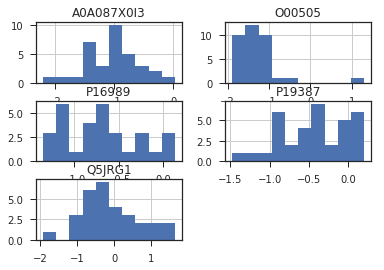

In [313]:
sb = pandas.read_table('../../promec/Animesh/Lymphoma/HenrikList.txt')
nm = pandas.read_table('../../promec/Animesh/Lymphoma/HenrikFtrSel.txt')
sb[sb.Remove!="Y"].count()
df = pandas.read_table('../../promec/Animesh/Lymphoma/Copy of SuperSILACpTtestLars DoesNotWantButtStillWantsremoved.txt')
prot=df[df['T: Uniprot'].isin(nm.attribute)].iloc[:,:35].transpose()
prot.index.name = 'Name'
prot.columns=nm.attribute
prot.hist()
prot.index.name = 'Name'
prot.reset_index(inplace=True)
#protid=pandas.merge(prot,sb,on='Name',how='outer')
protid#.hist()
#sb

In [310]:
#import seaborn
import seaborn as sb; sb.set(style="ticks", color_codes=True)
#sb.pointplot('Q96K76','Q96K76',hue='Lymphoma',data=protid)
#seaborn.pointplot(100,100,hue='Lymphoma',data=protid)
#gp = sb.pairplot(protid.fillna(0)[protn],hue="Lymphoma")
#protid = protid.drop('Subject', 1)
#protid = protid.drop('Suff', 1)
#protid = protid.drop('Prefix', 1)
#gp = sb.pairplot(protid.fillna(0),hue="Lymphoma")
protid
#protid[protn]
#protid.fillna(0)

,Name,A0A087X0I3,O75995,Lymphoma,B-nummer,Transformert (T) og Ikke-T (IT),transformasjon,Remove
0,1_19913,-0.547055,0.910231,IT,B19913/01,IT,16,NaN
1,10_29288,-0.184852,1.197100,IT,B29288/02,IT,15,NaN
2,11_13476,NaN,-0.041523,IT,B13476/88,IT,13,Y
3,12_22298,-0.449852,1.377140,IT,B22298/01,IT,16,NaN
4,13_15972,0.299596,0.401482,T,B15972/09,T,3,NaN
5,14_16003,-0.164915,1.073580,IT,B16003/03,IT,14,NaN
6,15_13187,-0.717035,1.655220,IT,B13187/03,IT,13,Y
7,16_2066,0.860792,1.043880,IT,B2066/06,IT,11,NaN
8,17_9657,-0.477056,0.951596,IT,B9657/01,IT,16,NaN
9,18_14775,NaN,1.470450,T,B14775/01,T,4,NaN


In [65]:
from bqplot import pyplot as plt
plt.plot(prot)
plt.show()


,Name,0
0,1_19913,-1.068670
1,10_29288,-1.090920
2,11_13476,-1.884320
3,12_22298,-1.706330
4,13_15972,0.034677
5,14_16003,-0.816231
6,15_13187,-2.201510
7,16_2066,-0.945907
8,17_9657,-1.022260
9,18_14775,-0.540920


In [ ]:
import keras
from keras.models import Sequential
model = Sequential()

In [6]:
from ipywidgets import IntSlider
IntSlider()

In [3]:
%load_ext rpy2.ipython


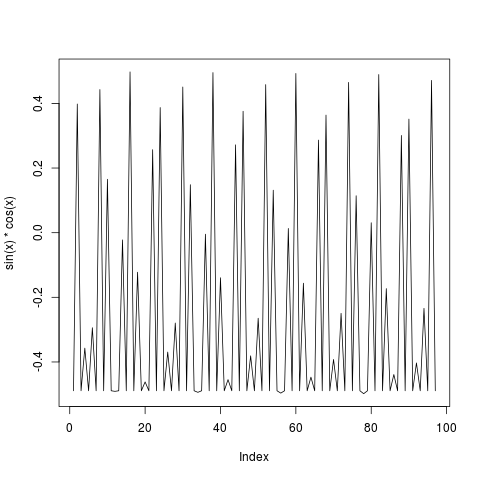

In [5]:
%%R
?plot
x=-2*pi:2*pi:100
plot(sin(x)*cos(x),type="l",color="blue")

In [ ]:
%%perl
open(F,"../../promec/Animesh/Lymphoma/LymphonaLog2LHsilacTrp.txt");
while(<F>){
    print join(",",split(/\t/,$_))
}


In [ ]:
%%bash
ls $HOME/promec/Animesh/Lymphoma

In [ ]:
from keras.layers import Dense, Activation

model.add(Dense(units=64, input_dim=100))
model.add(Activation('relu'))
model.add(Dense(units=10))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True))


In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=32)